In [1]:
import os
import glob
import numpy as np

import matplotlib.pyplot as plt
import pandas as pd
import math
import pili_assymetry_utils as assym

pili_assymetry_utils loaded successfully


In [10]:
tot_pili_limit=20
nb_pili_difference=20
cwd = os.getcwd()
master_file=os.path.join(cwd, "Combined_all_data.csv")
os.chdir(cwd)
pili_fliC, assym_fliC, n_fliC, probs_fliC, df_probs_fliC =assym.getProbs(master_file, "fliCsol_piliDistProb.csv", tot_pili_limit, nb_pili_difference, 'fliC-')
print('Assymetric fliC-')
print(np.array(n_fliC).sum())
print(n_fliC)
print(pili_fliC)
print(assym_fliC)

pili_pilHcyaBfliC, assym_pilHcyaBfliC, n_pilHcyaBfliC, probs_pilHcyaBfliC, df_probs_pilHcyaBfliC =assym.getProbs(master_file, "pilHcyaBfliCsol_piliDistProb.csv", tot_pili_limit, nb_pili_difference, 'pilH-cyaB-fliC-')
print('Assymetric pilH-cyaB-fliC-')
print(np.array(n_pilHcyaBfliC).sum())
print(n_pilHcyaBfliC)
print(pili_pilHcyaBfliC)
print(assym_pilHcyaBfliC)

pili_cpdAfliC, assym_cpdAfliC, n_cpdAfliC, probs_cpdAfliC, df_probs_cpdAfliC =assym.getProbs(master_file, "cpdAfliCsol_piliDistProb.csv", tot_pili_limit, nb_pili_difference, 'cpdA-fliC-')
print('Assymetric cpdA-fliC-')
print(np.array(n_cpdAfliC).sum())
print(n_cpdAfliC)
print(pili_cpdAfliC)
print(assym_cpdAfliC)

pili_pilGcpdAfliC, assym_pilGcpdAfliC, n_pilGcpdAfliC, probs_pilGcpdAfliC, df_probs_pilGcpdAfliC =assym.getProbs(master_file, "pilGcpdAfliCsol_piliDistProb.csv", tot_pili_limit, nb_pili_difference, 'pilG-cpdA-fliC-')
print('Assymetric pilG-cpdA-fliC-')
print(np.array(n_pilGcpdAfliC).sum())
print(n_pilGcpdAfliC)
print(pili_pilGcpdAfliC)
print(assym_pilGcpdAfliC)

Assymetric fliC-
97
[19, 24, 16, 13, 11, 6, 3, 2, 2, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0]
[ 2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21]
[0.42105263157894735, 1.0, 0.8125, 1.0, 0.9090909090909091, 1.0, 0.6666666666666666, 1.0, 1.0, 0, 0, 0, 0, 0, 1.0, 0, 0, 0, 0, 0]
Assymetric pilH-cyaB-fliC-
70
[29, 11, 17, 5, 3, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[ 2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21]
[0.6206896551724138, 1.0, 0.5882352941176471, 1.0, 0.6666666666666666, 1.0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Assymetric cpdA-fliC-
109
[4, 8, 11, 18, 16, 10, 8, 6, 4, 7, 3, 4, 3, 3, 2, 2, 0, 0, 0, 0]
[ 2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21]
[0.5, 1.0, 0.6363636363636364, 1.0, 0.6875, 1.0, 0.75, 1.0, 1.0, 1.0, 1.0, 1.0, 0.3333333333333333, 1.0, 1.0, 1.0, 0, 0, 0, 0]
Assymetric pilG-cpdA-fliC-
48
[24, 11, 7, 3, 0, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[ 2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21]
[0.0833333333

In [5]:
n_pili=np.linspace(2,tot_pili_limit+1, 20, dtype=np.int16)
n_pil=np.linspace(0,tot_pili_limit+1,22, dtype=np.int16)
diff_even=n_pil[0::2]
diff_odd=n_pil[1::2]
probs=np.zeros([nb_pili_difference,tot_pili_limit])
for val, i in enumerate(n_pil[2:]):
    if (i % 2 == 0):
        diff=diff_even[diff_even<=i]
    else:
        diff=diff_odd[diff_odd<=i]
    for j, d in enumerate(diff):
        if (i % 2 == 0):
            k=i/2+j
            index=j*2
            if ((index<tot_pili_limit)):
                if(j==0):
                    probs[index, val]=math.factorial(i)/math.factorial(i-k)/math.factorial(k)/2
                else:
                    probs[index, val]=math.factorial(i)/math.factorial(i-k)/math.factorial(k)
        else:
            k=i-(j*2+1)
            #print('i='+str(i)+ ' k='+str(k))
            index=1+j*2
            if ((index<tot_pili_limit) & (k<=i)):
                probs[index, val]=math.factorial(i)/math.factorial(i-k)/math.factorial(k)
for i in range(tot_pili_limit):
    probs[:,i]=probs[:,i]/np.sum(probs[:,i])
pili=np.arange(2,tot_pili_limit+2)
df_stat=pd.DataFrame(probs, columns = list(pili))
df_stat.to_csv( os.path.join(cwd, "Ref_Stat_data.csv"), index=False, encoding='utf-8-sig')
df_stat.head()

,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21
0,0.5,0.00,0.375,0.0000,0.31250,0.000000,0.273438,0.000000,0.246094,0.000000,0.225586,0.000000,0.209473,0.000000,0.196381,0.000000,0.185471,0.000000,0.176197,0.000000
1,0.0,0.75,0.000,0.3125,0.00000,0.109375,0.000000,0.035156,0.000000,0.010742,0.000000,0.003174,0.000000,0.000916,0.000000,0.000259,0.000000,0.000072,0.000000,0.000020
2,0.5,0.00,0.500,0.0000,0.46875,0.000000,0.437500,0.000000,0.410156,0.000000,0.386719,0.000000,0.366577,0.000000,0.349121,0.000000,0.333847,0.000000,0.320359,0.000000
3,0.0,0.25,0.000,0.6250,0.00000,0.546875,0.000000,0.328125,0.000000,0.161133,0.000000,0.069824,0.000000,0.027771,0.000000,0.010376,0.000000,0.003696,0.000000,0.001268
4,0.0,0.00,0.125,0.0000,0.18750,0.000000,0.218750,0.000000,0.234375,0.000000,0.241699,0.000000,0.244385,0.000000,0.244385,0.000000,0.242798,0.000000,0.240269,0.000000


[None, None, None, None]
Reference
[15.0, 7.5, 18.75]
0.4583333333333333
strain:WT
[8.0, 7.0, 13.0]
strain:ΔcpdA
[2.0, 3.0, 7.0]
strain:ΔpilGΔcpdA
[2.0, 1.0, 0.0]
strain:ΔpilHΔcyaB
[18.0, 8.0, 10.0]
[0.63157895 0.07142857 0.52173913 0.47457627]
[4 3 2 1]


<ipython-input-6-21773926a0ba>:35: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(x_)


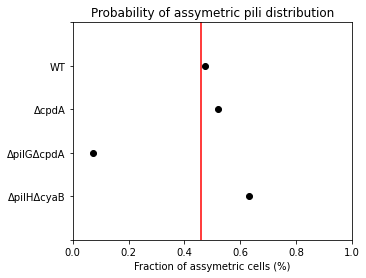

In [6]:
input_cell_nb_array=list([[30, 30, 30], n_fliC, n_cpdAfliC, n_pilGcpdAfliC, n_pilHcyaBfliC]) 
input_probability_DataFrame=list([df_stat, df_probs_fliC, df_probs_cpdAfliC, df_probs_pilGcpdAfliC, df_probs_pilHcyaBfliC])
tot_assymetric=[None]*(len(input_cell_nb_array)-1)
print(tot_assymetric)
Strains=['WT', 'ΔcpdA', 'ΔpilGΔcpdA', 'ΔpilHΔcyaB']
print('Reference')
input_probability_matrix=np.array(input_probability_DataFrame[0])
tot_cells=np.sum(input_cell_nb_array[0][0:3])
cell=[None]*3
for i in range(3):
    cell[i]=np.sum(input_probability_matrix[2:5,i]*input_cell_nb_array[0][i])
print(cell)
Ref_tot_assymetric=np.sum(cell)/tot_cells
print(Ref_tot_assymetric)
for strain in range(len(tot_assymetric)):
    print('strain:'+Strains[strain])
    input_probability_matrix=np.array(input_probability_DataFrame[strain+1])
    tot_cells=np.sum(input_cell_nb_array[strain+1][0:3])
    cell=[None]*3
    for i in range(3):
        cell[i]=np.sum(input_probability_matrix[2:5,i]*input_cell_nb_array[strain+1][i])
    print(cell)
    tot_assymetric[strain]=np.sum(cell)/tot_cells
print(np.flip(tot_assymetric))
fig1, ax1=plt.subplots(1,1)
fig1.set_size_inches(5, 4)
ax1.set_xlim(0,1)
ax1.set_xlabel('Fraction of assymetric cells (%)')
ax1.set_ylim(0,len(tot_assymetric)+1)
x=np.arange(1,len(tot_assymetric)+1)
print(np.flip(x))
x_=['','ΔpilHΔcyaB', 'ΔpilGΔcpdA','ΔcpdA' , 'WT']
plt.plot(tot_assymetric,np.flip(x), 'ok')
plt.plot(np.ones(6)*Ref_tot_assymetric,[0,1,2,3,4,5], 'r')
ax1.set_yticklabels(x_)
plt.title("Probability of assymetric pili distribution")
save_name='assymetric_probability_barplot.svg'
fig1.savefig(save_name, dpi=300)

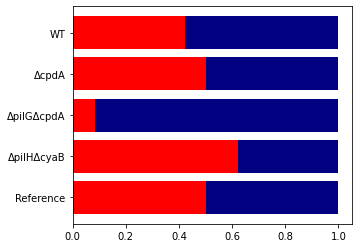

In [7]:
TwoIndex= (0,2)
ThreeIndex= (1,3)
FourIndex= (0,2,4)
Strains=['WT', 'ΔcpdA', 'ΔpilGΔcpdA', 'ΔpilHΔcyaB', 'Reference']

#2 pili
col=0
sym=0
ind=TwoIndex
Sym=[np.flip(probs_fliC[ind,col])[sym], np.flip(probs_cpdAfliC[ind,col])[sym], np.flip(probs_pilGcpdAfliC[ind,col])[sym], np.flip(probs_pilHcyaBfliC[ind,col])[sym], np.flip(probs[ind,col])[sym]]
sym=1
Asym=[np.flip(probs_fliC[ind,col])[sym], np.flip(probs_cpdAfliC[ind,col])[sym], np.flip(probs_pilGcpdAfliC[ind,col])[sym], np.flip(probs_pilHcyaBfliC[ind,col])[sym], np.flip(probs[ind,col])[sym]]
fig2, ax2=plt.subplots(1,1)
fig2.set_size_inches(5, 4)
# plot bars in stack manner
plt.barh(np.flip(Strains), np.flip(Sym), color='r')
plt.barh(np.flip(Strains), np.flip(Asym), left=np.flip(Sym), color='navy')
plt.show()

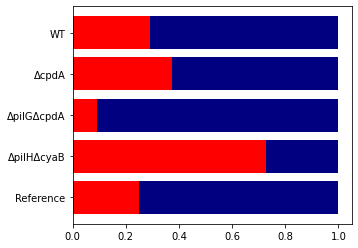

In [8]:
#3 pili
col=1
sym=0
ind=ThreeIndex
Sym=[np.flip(probs_fliC[ind,col])[sym], np.flip(probs_cpdAfliC[ind,col])[sym], np.flip(probs_pilGcpdAfliC[ind,col])[sym], np.flip(probs_pilHcyaBfliC[ind,col])[sym], np.flip(probs[ind,col])[sym]]
sym=1
Asym=[np.flip(probs_fliC[ind,col])[sym], np.flip(probs_cpdAfliC[ind,col])[sym], np.flip(probs_pilGcpdAfliC[ind,col])[sym], np.flip(probs_pilHcyaBfliC[ind,col])[sym], np.flip(probs[ind,col])[sym]]
fig3, ax3=plt.subplots(1,1)
fig3.set_size_inches(5, 4)
# plot bars in stack manner
plt.barh(np.flip(Strains), np.flip(Sym), color='r')
plt.barh(np.flip(Strains), np.flip(Asym), left=np.flip(Sym), color='navy')
plt.show()

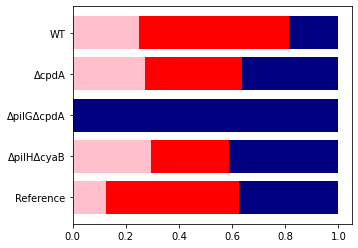

In [9]:
#3 pili
col=2
sym=0
ind=FourIndex
Sym=[np.flip(probs_fliC[ind,col])[sym], np.flip(probs_cpdAfliC[ind,col])[sym], np.flip(probs_pilGcpdAfliC[ind,col])[sym], np.flip(probs_pilHcyaBfliC[ind,col])[sym], np.flip(probs[ind,col])[sym]]
sym=1
Asym1=[np.flip(probs_fliC[ind,col])[sym], np.flip(probs_cpdAfliC[ind,col])[sym], np.flip(probs_pilGcpdAfliC[ind,col])[sym], np.flip(probs_pilHcyaBfliC[ind,col])[sym], np.flip(probs[ind,col])[sym]]
sym=2
Asym2=[np.flip(probs_fliC[ind,col])[sym], np.flip(probs_cpdAfliC[ind,col])[sym], np.flip(probs_pilGcpdAfliC[ind,col])[sym], np.flip(probs_pilHcyaBfliC[ind,col])[sym], np.flip(probs[ind,col])[sym]]
fig4, ax4=plt.subplots(1,1)
fig4.set_size_inches(5, 4)
# plot bars in stack manner
plt.barh(np.flip(Strains), np.flip(Sym), color='pink')
plt.barh(np.flip(Strains), np.flip(Asym1), left=np.flip(Sym), color='r')
plt.barh(np.flip(Strains), np.flip(Asym2), left=np.flip(Sym)+np.flip(Asym1), color='navy')
plt.show()